In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dépenses en énergie

In [4]:
# Excel IEA des dépenses en énergie - version complète
budgets = pd.read_excel('Budgets_Public-RDD-Expenditures.xlsx')
budgets

,Country,Currency,Technology,1974,1975,1976,1977,1978,1979,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Australia,National currency (nominal),Energy efficiency,..,..,..,..,..,0,5.4,...,29.451,21.467,28.108,32.881,46.263,30.62,46.658,58.852,21.792,..
1,Australia,National currency (nominal),Fossil fuels,..,..,..,..,..,13.41,20.75,...,64.41,42.331,67.878,71.2,68.4,49.117,46.41,138.832,75.171,..
2,Australia,National currency (nominal),Renewables,..,..,..,..,..,6.43,9.96,...,151.449,56.188,68.475,66.505,75.744,41.276,62.038,82.547,78.583,..
3,Australia,National currency (nominal),Nuclear,..,..,..,..,..,0,0,...,9.118,17.551,10.016,8.786,9.789,10.246,15.395,18.026,18.9,..
4,Australia,National currency (nominal),Hydrogen and fuel cells,..,..,..,..,..,..,..,...,4.149,3.883,5.877,32.263,49.781,46.045,81.731,154.66,151.633,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,IEA Asia Oceania,Euro (2023 prices and exchange rates),Hydrogen and fuel cells,0,0,0,0,0,0,0,...,125.278,132.645,138.756,207.485,279.175,307.048,316.877,357.241,349.425,..
1634,IEA Asia Oceania,Euro (2023 prices and exchange rates),Other power and storage technologies,14.508,14.788,12.067,12.509,16.601,23.984,67.243,...,181.178,254.678,232.225,249.979,233.336,253.952,284.223,301.592,289.813,..
1635,IEA Asia Oceania,Euro (2023 prices and exchange rates),Other cross-cutting technologies/research,262.769,307.239,311.308,15.181,19.086,33.579,55.702,...,165.21,90.855,164.515,168.088,194.607,179.515,162.494,144.941,125.801,..
1636,IEA Asia Oceania,Euro (2023 prices and exchange rates),Unallocated,0,0,0,0,0,0,0,...,2.119,5.695,6.724,5.813,4.873,6.841,1.973,1.339,2.539,..


In [5]:
# Excel IEA dépenses en énergie - Currency en USA (2023 prices and Puchasing Power Parity) - de 2007 à 2017
budgets = budgets[budgets['Currency'] == 'USD (2023 prices and PPP)']
# Premier drop de colonnes des années 1974 -> 2006
columns_to_drop = [str(year) for year in range(1974, 2007)]
budgets = budgets.drop(columns=columns_to_drop)
budgets


,Country,Currency,Technology,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
27,Australia,USD (2023 prices and PPP),Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,...,25.637,18.553,23.448,26.795,36.508,23.812,34.419,39.997,14.337,..
28,Australia,USD (2023 prices and PPP),Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,...,56.069,36.584,56.626,58.022,53.978,38.196,34.236,94.353,49.455,..
29,Australia,USD (2023 prices and PPP),Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,...,131.836,48.56,57.124,54.196,59.773,32.098,45.764,56.101,51.699,..
30,Australia,USD (2023 prices and PPP),Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,...,7.937,15.168,8.356,7.16,7.725,7.968,11.357,12.251,12.434,..
31,Australia,USD (2023 prices and PPP),Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,...,3.612,3.356,4.903,26.292,39.285,35.808,60.292,105.11,99.759,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,IEA Asia Oceania,USD (2023 prices and PPP),Hydrogen and fuel cells,323.315,384.13,280.833,235.946,206.226,228.155,198.092,...,211.415,225.216,234.524,337.125,448.841,500.616,509.326,555.46,546.918,..
1625,IEA Asia Oceania,USD (2023 prices and PPP),Other power and storage technologies,229.469,249.023,296.269,317.613,275.889,296.643,261.447,...,311.592,432.492,393.895,424.464,388,428.988,461.49,492.796,487.675,..
1626,IEA Asia Oceania,USD (2023 prices and PPP),Other cross-cutting technologies/research,128.34,157.902,50.939,59.663,45.63,38.538,45.124,...,278.753,155.053,278.503,284.461,321.398,289.134,255.099,216.446,192.717,..
1627,IEA Asia Oceania,USD (2023 prices and PPP),Unallocated,0,0,0,0,0,0,0,...,2.269,6.098,7.718,6.709,5.84,8.2,2.365,1.605,3.043,..


In [6]:
# Second drop de colonnes des années 1974 -> 2006
columns_to_drop_2 = [str(year) for year in range(2018, 2025)]
budgets = budgets.drop(columns=columns_to_drop_2)
budgets

,Country,Currency,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
27,Australia,USD (2023 prices and PPP),Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
28,Australia,USD (2023 prices and PPP),Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
29,Australia,USD (2023 prices and PPP),Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
30,Australia,USD (2023 prices and PPP),Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,6.819,7.937,15.168,8.356
31,Australia,USD (2023 prices and PPP),Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,IEA Asia Oceania,USD (2023 prices and PPP),Hydrogen and fuel cells,323.315,384.13,280.833,235.946,206.226,228.155,198.092,199.108,211.415,225.216,234.524
1625,IEA Asia Oceania,USD (2023 prices and PPP),Other power and storage technologies,229.469,249.023,296.269,317.613,275.889,296.643,261.447,304.906,311.592,432.492,393.895
1626,IEA Asia Oceania,USD (2023 prices and PPP),Other cross-cutting technologies/research,128.34,157.902,50.939,59.663,45.63,38.538,45.124,36.113,278.753,155.053,278.503
1627,IEA Asia Oceania,USD (2023 prices and PPP),Unallocated,0,0,0,0,0,0,0,6.699,2.269,6.098,7.718


In [7]:
# Trier le dataframe avec uniquement les pays de la sélection
pays_a_conserver = ['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
                    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                    'Germany', 'Greece','Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Lithuania', 'Luxembourg',
                    'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
                    'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
                    'Republic of Türkiye', 'United Kingdom', 'United States']

budgets = budgets[budgets['Country'].isin(pays_a_conserver)]
budgets = budgets.drop(columns='Currency')
budgets

,Country,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
27,Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
28,Australia,Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
29,Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
30,Australia,Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,6.819,7.937,15.168,8.356
31,Australia,Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,United States,Hydrogen and fuel cells,454.24,445.975,491.541,454.262,347.14,155.215,185.866,182.032,156.122,125.645,123.496
1472,United States,Other power and storage technologies,185.536,168.305,1270.275,375.142,238.398,133.373,144.127,349.796,312.478,212.652,249.368
1473,United States,Other cross-cutting technologies/research,1686.355,1807.602,6.904,150.057,2887.136,3165.839,3027.6,2911.436,2857.543,2705.12,2695.016
1474,United States,Unallocated,0,0,0,0,0,0,0,0,0,212.705,147.583


In [8]:
# Je renomme la colonne "Country" en "Economy Name" pour pouvoir fusionner avec d'autres dataframe contenant cet intitulé
budgets.rename(columns = {'Country' : 'Economy Name'}, inplace = True)
budgets

,Economy Name,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
27,Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
28,Australia,Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
29,Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
30,Australia,Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,6.819,7.937,15.168,8.356
31,Australia,Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,United States,Hydrogen and fuel cells,454.24,445.975,491.541,454.262,347.14,155.215,185.866,182.032,156.122,125.645,123.496
1472,United States,Other power and storage technologies,185.536,168.305,1270.275,375.142,238.398,133.373,144.127,349.796,312.478,212.652,249.368
1473,United States,Other cross-cutting technologies/research,1686.355,1807.602,6.904,150.057,2887.136,3165.839,3027.6,2911.436,2857.543,2705.12,2695.016
1474,United States,Unallocated,0,0,0,0,0,0,0,0,0,212.705,147.583


## Traitement des valeurs manquantes (Interpolate)

In [9]:
# Remplacer les ".." par np.nan dans les colonnes de 2007 à 2017
years = [str(year) for year in range(2007, 2018)]
budgets[years] = budgets[years].replace("..", np.nan)

In [10]:
# Vérifier pour une énergie pour laquelle nous avions des ".." que nous avons maintenant des NaN
budgets[budgets['Technology'] == 'Renewables']

,Economy Name,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
29,Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.560,57.124
74,Austria,Renewables,28.002,45.348,59.308,60.608,58.045,48.935,50.330,54.151,36.128,48.910,33.920
119,Belgium,Renewables,27.484,NaN,NaN,0.000,29.660,29.787,32.115,44.781,28.922,24.496,25.865
164,Brazil,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,421.388,502.598,399.460,330.241,297.990
209,Canada,Renewables,84.813,103.536,168.995,167.776,196.938,225.268,134.360,117.747,144.331,121.561,123.506
254,Chile,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.944,11.740,9.488,12.667
299,Czech Republic,Renewables,3.239,14.504,17.274,16.814,27.030,22.797,14.155,14.069,17.550,15.384,16.499
344,Denmark,Renewables,60.043,66.714,79.416,116.253,108.223,88.737,113.492,76.134,94.884,62.323,38.042
389,Estonia,Renewables,NaN,NaN,NaN,NaN,12.435,0.420,3.629,2.545,2.967,2.649,0.987
434,Finland,Renewables,56.760,58.030,70.931,66.722,90.959,57.420,75.190,47.815,54.073,48.433,54.702


In [11]:
budgets_interpolate = budgets

In [12]:
budgets_interpolate.set_index('Economy Name', inplace=True)
budgets_interpolate

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Economy Name,,,,,,,,,,,,
Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
Australia,Fossil fuels,73.866,68.549,285.321,204.420,230.431,347.630,282.700,134.791,56.069,36.584,56.626
Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.560,57.124
Australia,Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.700,6.819,7.937,15.168,8.356
Australia,Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Hydrogen and fuel cells,454.240,445.975,491.541,454.262,347.140,155.215,185.866,182.032,156.122,125.645,123.496
United States,Other power and storage technologies,185.536,168.305,1270.275,375.142,238.398,133.373,144.127,349.796,312.478,212.652,249.368
United States,Other cross-cutting technologies/research,1686.355,1807.602,6.904,150.057,2887.136,3165.839,3027.600,2911.436,2857.543,2705.120,2695.016


In [13]:
budgets_interpolate_transpose = budgets_interpolate.T
budgets_interpolate_transpose

Economy Name,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,...,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States
Technology,Energy efficiency,Fossil fuels,Renewables,Nuclear,Hydrogen and fuel cells,Other power and storage technologies,Other cross-cutting technologies/research,Unallocated,Total Budget,Energy efficiency,...,Total Budget,Energy efficiency,Fossil fuels,Renewables,Nuclear,Hydrogen and fuel cells,Other power and storage technologies,Other cross-cutting technologies/research,Unallocated,Total Budget
2007,35.457,73.866,50.553,16.184,0.678,14.254,125.908,0.0,316.899,14.511,...,308.186,776.323,640.3,787.765,1190.516,454.24,185.536,1686.355,0.0,5721.034
2008,41.628,68.549,43.747,24.807,0.317,13.639,124.501,0.0,317.186,43.617,...,327.853,920.518,785.768,622.482,1341.637,445.975,168.305,1807.602,0.0,6092.286
2009,37.391,285.321,84.191,2.756,1.168,16.266,9.836,0.0,436.926,68.167,...,549.754,2932.679,4635.123,3045.899,1163.959,491.541,1270.275,6.904,0.0,13546.38
2010,120.389,204.42,89.589,2.722,2.215,12.576,10.801,0.0,442.712,100.321,...,1026.915,1898.898,627.509,1787.038,1211.366,454.262,375.142,150.057,0.0,6504.272
2011,87.003,230.431,173.803,5.357,2.207,10.473,7.323,0.0,516.597,112.819,...,691.138,1178.944,674.945,1551.141,1637.701,347.14,238.398,2887.136,0.0,8515.404
2012,63.043,347.63,226.167,10.193,0.199,16.696,13.284,0.0,677.212,96.067,...,615.712,1266.211,411.917,1955.033,1015.698,155.215,133.373,3165.839,0.0,8103.285
2013,62.067,282.7,448.283,7.7,1.606,20.822,8.117,0.0,831.295,94.868,...,769.826,1630.012,445.672,1266.488,952.791,185.866,144.127,3027.6,0.0,7652.556
2014,25.712,134.791,81.671,6.819,3.527,9.284,0.19,6.699,268.695,103.143,...,645.428,1644.303,537.083,1146.593,1111.963,182.032,349.796,2911.436,0.0,7883.206
2015,25.637,56.069,131.836,7.937,3.612,14.619,1.912,2.269,243.89,93.03,...,704.755,1522.566,521.679,1130.971,1106.927,156.122,312.478,2857.543,0.0,7608.286


In [14]:
technology = budgets_interpolate_transpose.head(1)

In [15]:
colonnes = budgets_interpolate_transpose.columns.tolist()
colonnes

['Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Eston

In [16]:
for col in colonnes:
    budgets_interpolate_transpose[col] = budgets_interpolate_transpose[col].apply(pd.to_numeric, errors='coerce').interpolate()

In [17]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_transpose), axis=0)

In [18]:
budgets_interpolate_concat2 = budgets_interpolate_concat.drop(budgets_interpolate_concat.index[1])
budgets_interpolate_concat2

Economy Name,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,...,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States
2007,35.457,73.866,50.553,16.184,0.678,14.254,125.908,0.0,316.899,14.511,...,308.186,776.323,640.3,787.765,1190.516,454.24,185.536,1686.355,0.0,5721.034
2008,41.628,68.549,43.747,24.807,0.317,13.639,124.501,0.0,317.186,43.617,...,327.853,920.518,785.768,622.482,1341.637,445.975,168.305,1807.602,0.0,6092.286
2009,37.391,285.321,84.191,2.756,1.168,16.266,9.836,0.0,436.926,68.167,...,549.754,2932.679,4635.123,3045.899,1163.959,491.541,1270.275,6.904,0.0,13546.38
2010,120.389,204.42,89.589,2.722,2.215,12.576,10.801,0.0,442.712,100.321,...,1026.915,1898.898,627.509,1787.038,1211.366,454.262,375.142,150.057,0.0,6504.272
2011,87.003,230.431,173.803,5.357,2.207,10.473,7.323,0.0,516.597,112.819,...,691.138,1178.944,674.945,1551.141,1637.701,347.14,238.398,2887.136,0.0,8515.404
2012,63.043,347.63,226.167,10.193,0.199,16.696,13.284,0.0,677.212,96.067,...,615.712,1266.211,411.917,1955.033,1015.698,155.215,133.373,3165.839,0.0,8103.285
2013,62.067,282.7,448.283,7.7,1.606,20.822,8.117,0.0,831.295,94.868,...,769.826,1630.012,445.672,1266.488,952.791,185.866,144.127,3027.6,0.0,7652.556
2014,25.712,134.791,81.671,6.819,3.527,9.284,0.19,6.699,268.695,103.143,...,645.428,1644.303,537.083,1146.593,1111.963,182.032,349.796,2911.436,0.0,7883.206
2015,25.637,56.069,131.836,7.937,3.612,14.619,1.912,2.269,243.89,93.03,...,704.755,1522.566,521.679,1130.971,1106.927,156.122,312.478,2857.543,0.0,7608.286
2016,18.553,36.584,48.56,15.168,3.356,16.148,2.221,6.098,146.688,106.399,...,881.552,1932.737,618.105,896.19,1064.921,125.645,212.652,2705.12,212.705,7768.075


In [19]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_concat2), axis=0)
budgets_interpolate_concat

Economy Name,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,...,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States
Technology,Energy efficiency,Fossil fuels,Renewables,Nuclear,Hydrogen and fuel cells,Other power and storage technologies,Other cross-cutting technologies/research,Unallocated,Total Budget,Energy efficiency,...,Total Budget,Energy efficiency,Fossil fuels,Renewables,Nuclear,Hydrogen and fuel cells,Other power and storage technologies,Other cross-cutting technologies/research,Unallocated,Total Budget
2007,35.457,73.866,50.553,16.184,0.678,14.254,125.908,0.0,316.899,14.511,...,308.186,776.323,640.3,787.765,1190.516,454.24,185.536,1686.355,0.0,5721.034
2008,41.628,68.549,43.747,24.807,0.317,13.639,124.501,0.0,317.186,43.617,...,327.853,920.518,785.768,622.482,1341.637,445.975,168.305,1807.602,0.0,6092.286
2009,37.391,285.321,84.191,2.756,1.168,16.266,9.836,0.0,436.926,68.167,...,549.754,2932.679,4635.123,3045.899,1163.959,491.541,1270.275,6.904,0.0,13546.38
2010,120.389,204.42,89.589,2.722,2.215,12.576,10.801,0.0,442.712,100.321,...,1026.915,1898.898,627.509,1787.038,1211.366,454.262,375.142,150.057,0.0,6504.272
2011,87.003,230.431,173.803,5.357,2.207,10.473,7.323,0.0,516.597,112.819,...,691.138,1178.944,674.945,1551.141,1637.701,347.14,238.398,2887.136,0.0,8515.404
2012,63.043,347.63,226.167,10.193,0.199,16.696,13.284,0.0,677.212,96.067,...,615.712,1266.211,411.917,1955.033,1015.698,155.215,133.373,3165.839,0.0,8103.285
2013,62.067,282.7,448.283,7.7,1.606,20.822,8.117,0.0,831.295,94.868,...,769.826,1630.012,445.672,1266.488,952.791,185.866,144.127,3027.6,0.0,7652.556
2014,25.712,134.791,81.671,6.819,3.527,9.284,0.19,6.699,268.695,103.143,...,645.428,1644.303,537.083,1146.593,1111.963,182.032,349.796,2911.436,0.0,7883.206
2015,25.637,56.069,131.836,7.937,3.612,14.619,1.912,2.269,243.89,93.03,...,704.755,1522.566,521.679,1130.971,1106.927,156.122,312.478,2857.543,0.0,7608.286


In [20]:
budgets_interpolate = budgets_interpolate_concat.T
budgets_interpolate.head(50)

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Economy Name,,,,,,,,,,,,
Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
Australia,Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
Australia,Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,6.819,7.937,15.168,8.356
Australia,Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
Australia,Other power and storage technologies,14.254,13.639,16.266,12.576,10.473,16.696,20.822,9.284,14.619,16.148,14.15
Australia,Other cross-cutting technologies/research,125.908,124.501,9.836,10.801,7.323,13.284,8.117,0.19,1.912,2.221,2.144
Australia,Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.699,2.269,6.098,2.866
Australia,Total Budget,316.899,317.186,436.926,442.712,516.597,677.212,831.295,268.695,243.89,146.688,169.617


In [21]:
budgets_interpolate[budgets_interpolate['Technology'] == 'Renewables']

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Economy Name,,,,,,,,,,,,
Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
Austria,Renewables,28.002,45.348,59.308,60.608,58.045,48.935,50.33,54.151,36.128,48.91,33.92
Belgium,Renewables,27.484,18.322667,9.161333,0.0,29.66,29.787,32.115,44.781,28.922,24.496,25.865
Brazil,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,421.388,502.598,399.46,330.241,297.99
Canada,Renewables,84.813,103.536,168.995,167.776,196.938,225.268,134.36,117.747,144.331,121.561,123.506
Chile,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.944,11.74,9.488,12.667
Czech Republic,Renewables,3.239,14.504,17.274,16.814,27.03,22.797,14.155,14.069,17.55,15.384,16.499
Denmark,Renewables,60.043,66.714,79.416,116.253,108.223,88.737,113.492,76.134,94.884,62.323,38.042
Estonia,Renewables,NaN,NaN,NaN,NaN,12.435,0.42,3.629,2.545,2.967,2.649,0.987


In [22]:
budgets = budgets_interpolate
budgets.head(3)

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Economy Name,,,,,,,,,,,,
Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
Australia,Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124


In [23]:
# Vérifier pour une énergie pour laquelle nous avions des NaN que nous avons maintenant des données
budgets[budgets['Technology'] == 'Renewables']

# A vérifier : OK pour les NaN mais KO pour les valeurs interpolées qui ne semblent pas du bon ordre de grandeur

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Economy Name,,,,,,,,,,,,
Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
Austria,Renewables,28.002,45.348,59.308,60.608,58.045,48.935,50.33,54.151,36.128,48.91,33.92
Belgium,Renewables,27.484,18.322667,9.161333,0.0,29.66,29.787,32.115,44.781,28.922,24.496,25.865
Brazil,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,421.388,502.598,399.46,330.241,297.99
Canada,Renewables,84.813,103.536,168.995,167.776,196.938,225.268,134.36,117.747,144.331,121.561,123.506
Chile,Renewables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.944,11.74,9.488,12.667
Czech Republic,Renewables,3.239,14.504,17.274,16.814,27.03,22.797,14.155,14.069,17.55,15.384,16.499
Denmark,Renewables,60.043,66.714,79.416,116.253,108.223,88.737,113.492,76.134,94.884,62.323,38.042
Estonia,Renewables,NaN,NaN,NaN,NaN,12.435,0.42,3.629,2.545,2.967,2.649,0.987


In [24]:
budgets = budgets.reset_index('Economy Name')
budgets

,Economy Name,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,Energy efficiency,35.457,41.628,37.391,120.389,87.003,63.043,62.067,25.712,25.637,18.553,23.448
1,Australia,Fossil fuels,73.866,68.549,285.321,204.42,230.431,347.63,282.7,134.791,56.069,36.584,56.626
2,Australia,Renewables,50.553,43.747,84.191,89.589,173.803,226.167,448.283,81.671,131.836,48.56,57.124
3,Australia,Nuclear,16.184,24.807,2.756,2.722,5.357,10.193,7.7,6.819,7.937,15.168,8.356
4,Australia,Hydrogen and fuel cells,0.678,0.317,1.168,2.215,2.207,0.199,1.606,3.527,3.612,3.356,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,United States,Hydrogen and fuel cells,454.24,445.975,491.541,454.262,347.14,155.215,185.866,182.032,156.122,125.645,123.496
293,United States,Other power and storage technologies,185.536,168.305,1270.275,375.142,238.398,133.373,144.127,349.796,312.478,212.652,249.368
294,United States,Other cross-cutting technologies/research,1686.355,1807.602,6.904,150.057,2887.136,3165.839,3027.6,2911.436,2857.543,2705.12,2695.016
295,United States,Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.705,147.583


# Indicateurs économiques

In [25]:
df_economy = pd.read_excel('Economic_indicators (1).xlsx')
df_economy

,Economy ISO3,Economy Name,Indicator ID,Indicator,Attribute 1,Attribute 2,Attribute 3,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AUS,Australia,WEF.GCIHH.AIRSEATKM,"Available airline seat km/week, millions",Rank,-,-,-,8.00,8.00,7.00,6.00,6.00,6.00,6.00,7.00,7.00,7.00,7.00
1,AUS,Australia,WEF.GCIHH.AIRSEATKM,"Available airline seat km/week, millions",Value,-,-,-,2923.76,3233.83,3337.55,3587.13,3881.09,4092.36,4334.33,4467.15,4533.78,4840.97,5007.41
2,AUS,Australia,WEF.GCIHH.BBSUBPC,Fixed broadband Internet subscriptions/100 pop.,Rank,-,-,-,30.00,20.00,17.00,18.00,25.00,24.00,23.00,26.00,33.00,26.00,24.00
3,AUS,Australia,WEF.GCIHH.BBSUBPC,Fixed broadband Internet subscriptions/100 pop.,Value,-,-,-,10.43,19.15,24.53,25.36,23.19,23.93,25.06,25.01,25.76,27.85,30.44
4,AUS,Australia,WEF.GCIHH.BRIBEIDX,"Irregular payments and bribes, 1-7 (best)",Rank,-,-,-,NaN,NaN,NaN,16.00,23.00,20.00,20.00,16.00,16.00,17.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10753,USA,United States,WEF.GCIHH.STARTBUSPROC,No. procedures to start a business,Value,-,-,-,5.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
10754,USA,United States,WEF.GCIHH.TBPC,"Tuberculosis cases/100,000 pop.",Rank,-,-,-,3.00,1.00,1.00,6.00,4.00,4.00,8.00,5.00,2.00,3.00,3.00
10755,USA,United States,WEF.GCIHH.TBPC,"Tuberculosis cases/100,000 pop.",Value,-,-,-,4.53,4.00,4.00,4.76,4.10,4.10,3.90,3.60,3.30,3.10,3.20
10756,USA,United States,WEF.GCIHH.TFDUTY,"Trade tariffs, % duty",Rank,-,-,-,7.00,33.00,33.00,32.00,32.00,35.00,33.00,33.00,33.00,33.00,34.00


### GDP

In [26]:
# Extraction de l'indicateur GDP en PPP $ billions
df_economy_gdp = df_economy[(df_economy['Indicator'] == 'GDP (PPP$ billions)') & (df_economy['Attribute 1'] == "Value")]
df_economy_gdp.head(5)

,Economy ISO3,Economy Name,Indicator ID,Indicator,Attribute 1,Attribute 2,Attribute 3,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
279,AUS,Australia,WEF.GCIHH.GDPPPP,GDP (PPP$ billions),Value,-,-,-,680154.0,760812.0,795.30,851.17,882.36,914.48,970.76,999.60,1095.38,1138.08,1187.32
605,AUT,Austria,WEF.GCIHH.GDPPPP,GDP (PPP$ billions),Value,-,-,-,297727.0,317807.0,328.57,322.51,332.00,352.02,359.02,361.40,395.49,404.29,417.23
931,BEL,Belgium,WEF.GCIHH.GDPPPP,GDP (PPP$ billions),Value,-,-,-,364649.0,375993.0,389.52,382.75,394.35,413.28,420.31,422.81,481.47,494.12,509.53
1257,BRA,Brazil,WEF.GCIHH.GDPPPP,GDP (PPP$ billions),Value,-,-,-,1701183.0,1835642.0,1981.21,2013.19,2172.06,2294.24,2355.59,2423.31,3263.83,3192.40,3141.33
1583,CAN,Canada,WEF.GCIHH.GDPPPP,GDP (PPP$ billions),Value,-,-,-,1156463.0,1265838.0,1303.23,1281.06,1330.27,1396.13,1488.31,1526.08,1591.58,1631.94,1682.36


In [27]:
# Clean du df en supprimant les colonnes inutiles
# df_economy_gdp <> GDP in PPP$ billions
df_economy_gdp = df_economy_gdp.drop(columns=["Economy ISO3", "Indicator ID", "Indicator", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_economy_gdp.head(5)

,Economy Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
279,Australia,680154.0,760812.0,795.30,851.17,882.36,914.48,970.76,999.60,1095.38,1138.08,1187.32
605,Austria,297727.0,317807.0,328.57,322.51,332.00,352.02,359.02,361.40,395.49,404.29,417.23
931,Belgium,364649.0,375993.0,389.52,382.75,394.35,413.28,420.31,422.81,481.47,494.12,509.53
1257,Brazil,1701183.0,1835642.0,1981.21,2013.19,2172.06,2294.24,2355.59,2423.31,3263.83,3192.40,3141.33
1583,Canada,1156463.0,1265838.0,1303.23,1281.06,1330.27,1396.13,1488.31,1526.08,1591.58,1631.94,1682.36


In [28]:
# Clean des valeurs de 2007 et 2008 qui ne sont pas dans les bonnes échelles versus les années suivantes
df_economy_gdp['2007'] = (df_economy_gdp['2007'] / 1000).round(2)
df_economy_gdp['2008'] = (df_economy_gdp['2008'] / 1000).round(2)
df_economy_gdp

,Economy Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
279,Australia,680.15,760.81,795.30,851.17,882.36,914.48,970.76,999.60,1095.38,1138.08,1187.32
605,Austria,297.73,317.81,328.57,322.51,332.00,352.02,359.02,361.40,395.49,404.29,417.23
931,Belgium,364.65,375.99,389.52,382.75,394.35,413.28,420.31,422.81,481.47,494.12,509.53
1257,Brazil,1701.18,1835.64,1981.21,2013.19,2172.06,2294.24,2355.59,2423.31,3263.83,3192.40,3141.33
1583,Canada,1156.46,1265.84,1303.23,1281.06,1330.27,1396.13,1488.31,1526.08,1591.58,1631.94,1682.36
1909,Switzerland,272.30,300.19,312.75,314.87,324.51,339.89,363.42,371.57,472.83,482.35,495.96
2235,Chile,212.67,231.06,243.04,243.57,257.88,299.63,320.54,334.76,409.33,422.42,438.75
2561,Czechia,236.54,248.90,262.17,252.95,261.29,284.95,286.95,286.04,314.58,332.48,350.72
2887,Germany,2558.91,2809.69,2910.49,2806.27,2940.43,3099.08,3197.07,3232.54,3721.55,3840.55,3980.28
3213,Denmark,198.37,203.68,204.06,197.06,201.74,206.59,210.15,211.92,249.53,258.70,273.86


In [29]:
df_economy_gdp['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Czechia', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Sweden', 'Turkiye',
       'United States'], dtype=object)

In [30]:
# Je compare aux pays de mon DF budgets je constate un écart sur quelques noms de pays
budgets['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan',
       'Korea', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Republic of Türkiye',
       'United Kingdom', 'United States'], dtype=object)

In [31]:
dic = {"Czech Republic": "Czechia",
"Korea, Rep.": "Korea",
"Republic of Türkiye": "Turkiye"}

In [32]:
budgets['Economy Name'] = budgets['Economy Name'].replace(dic)
budgets['Economy Name'].unique()


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkiye', 'United Kingdom',
       'United States'], dtype=object)

In [33]:
# Focus GDP pays, exemple pour l'Australie
# Sélectionner les années de 2007 à 2017 :
years = [str(year) for year in range(2007, 2018)]

In [34]:
# Filtrer les données pour l'Australie et les années de 2007 à 2017 :
australia_gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == 'Australia'][years].transpose()
australia_gdp

,279
2007,680.15
2008,760.81
2009,795.30
2010,851.17
2011,882.36
2012,914.48
2013,970.76
2014,999.60
2015,1095.38
2016,1138.08


In [35]:
# Renommer les colonnes et ajuster l'index :
australia_gdp.columns = ['GDP']
australia_gdp.index.name = 'Year'
australia_gdp.reset_index(inplace=True)
australia_gdp

,Year,GDP
0,2007,680.15
1,2008,760.81
2,2009,795.30
3,2010,851.17
4,2011,882.36
5,2012,914.48
6,2013,970.76
7,2014,999.60
8,2015,1095.38
9,2016,1138.08


In [36]:
# Convertir les années en entiers :
australia_gdp['Year'] = australia_gdp['Year'].astype(int)

<ipython-input-37-6d7d59c835f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')


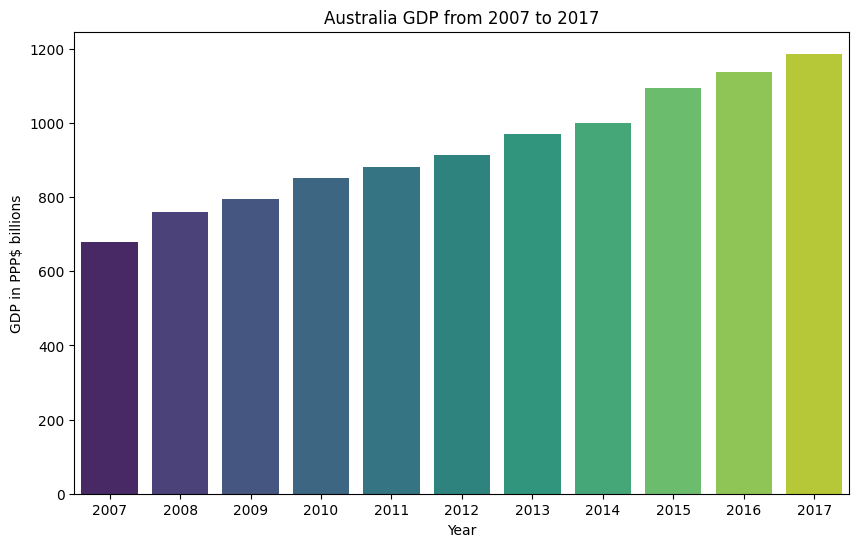

In [37]:
# Tracer le graphique en barres :
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')

plt.title('Australia GDP from 2007 to 2017')
plt.ylabel('GDP in PPP$ billions')

plt.show()

# To do : Comprendre pourquoi 2007 et 2008 ont des ordres de grandeur abbérantes

# Analyse par pays

### Korea

#### Korea - Investissements énergie

In [38]:
# Filtre sur le pays pour avoir les postes d'investissement en énergie de 2007 à 2017
budgets_korea = budgets[budgets['Economy Name'] == 'Korea']
budgets_korea = budgets_korea.drop(columns={'Economy Name'})
budgets_korea

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
153,Energy efficiency,158.801,151.771,160.843,166.444,152.633,189.883,173.239,173.883,175.284,181.952,224.707
154,Fossil fuels,115.552,95.804,136.186,135.243,119.07,157.152,176.102,155.116,155.498,91.879,83.219
155,Renewables,129.524,151.78,218.479,274.846,246.099,289.01,276.769,254.233,226.701,242.974,220.966
156,Nuclear,410.286,112.09,130.563,142.947,188.243,188.905,168.511,161.659,141.214,118.329,107.505
157,Hydrogen and fuel cells,73.429,126.927,93.986,86.056,78.814,58.779,58.193,48.524,45.597,59.593,59.251
158,Other power and storage technologies,47.995,88.623,120.67,127.895,118.507,156.38,176.334,190.369,191.383,180.641,158.838
159,Other cross-cutting technologies/research,0.0,31.093,36.705,44.504,35.314,25.254,37.007,35.923,41.864,48.828,52.997
160,Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,Total Budget,935.586,758.088,897.433,977.935,938.68,1065.363,1066.156,1019.707,977.54,924.195,907.483


##### Répartition des investissements par type d'énergie pour une année donnée

In [39]:
# Focus uniquement sur 2017 pour sortir le pie chart de répartition des investissements
columns_to_drop_korea = [str(year) for year in range(2007, 2017)]
budgets_korea_2017 = budgets_korea.drop(columns=columns_to_drop_korea)
budgets_korea_2017

,Technology,2017
153,Energy efficiency,224.707
154,Fossil fuels,83.219
155,Renewables,220.966
156,Nuclear,107.505
157,Hydrogen and fuel cells,59.251
158,Other power and storage technologies,158.838
159,Other cross-cutting technologies/research,52.997
160,Unallocated,0.0
161,Total Budget,907.483


In [40]:
# Drop des lignes total & unallocated > à voir en fonction des pays
budgets_korea_2017 = budgets_korea_2017.head(7)
budgets_korea_2017

,Technology,2017
153,Energy efficiency,224.707
154,Fossil fuels,83.219
155,Renewables,220.966
156,Nuclear,107.505
157,Hydrogen and fuel cells,59.251
158,Other power and storage technologies,158.838
159,Other cross-cutting technologies/research,52.997


In [41]:
budgets_korea_2017.dtypes

Technology    object
2017          object
dtype: object

In [42]:
# Mise au bon format int pour les valeurs de l'année 2017
budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)
budgets_korea_2017

<ipython-input-42-c5035cf96d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)


,Technology,2017
153,Energy efficiency,224
154,Fossil fuels,83
155,Renewables,220
156,Nuclear,107
157,Hydrogen and fuel cells,59
158,Other power and storage technologies,158
159,Other cross-cutting technologies/research,52


In [43]:
# Tri des valeurs par ordre décroissant
budgets_korea_2017 = budgets_korea_2017.sort_values(by='2017', ascending=False)

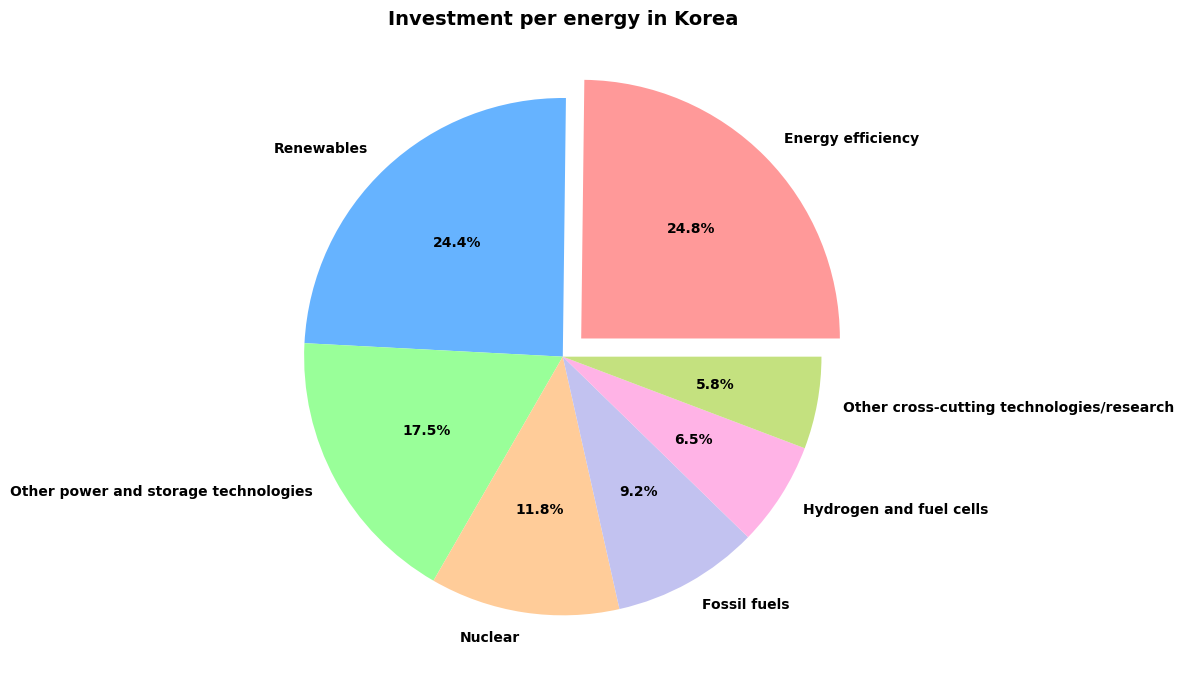

In [44]:
# Définir les données
sizes = budgets_korea_2017['2017']
labels = budgets_korea_2017['Technology']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']
explode = [0.1 if size == max(sizes) else 0 for size in sizes]  # Explose seulement le plus grand segment

# Créer le graphique
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, colors=colors, textprops={'weight': 'bold', 'fontsize': 10})
plt.title('Investment per energy in Korea', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

##### Evolution des investissements en énergie de 2007 à 2017

In [45]:
#retour au full années pour voir l'évolution des investissements sur la période complète et drop du total & unallocated > attention à voir en fonction du pays
budgets_korea

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
153,Energy efficiency,158.801,151.771,160.843,166.444,152.633,189.883,173.239,173.883,175.284,181.952,224.707
154,Fossil fuels,115.552,95.804,136.186,135.243,119.07,157.152,176.102,155.116,155.498,91.879,83.219
155,Renewables,129.524,151.78,218.479,274.846,246.099,289.01,276.769,254.233,226.701,242.974,220.966
156,Nuclear,410.286,112.09,130.563,142.947,188.243,188.905,168.511,161.659,141.214,118.329,107.505
157,Hydrogen and fuel cells,73.429,126.927,93.986,86.056,78.814,58.779,58.193,48.524,45.597,59.593,59.251
158,Other power and storage technologies,47.995,88.623,120.67,127.895,118.507,156.38,176.334,190.369,191.383,180.641,158.838
159,Other cross-cutting technologies/research,0.0,31.093,36.705,44.504,35.314,25.254,37.007,35.923,41.864,48.828,52.997
160,Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,Total Budget,935.586,758.088,897.433,977.935,938.68,1065.363,1066.156,1019.707,977.54,924.195,907.483


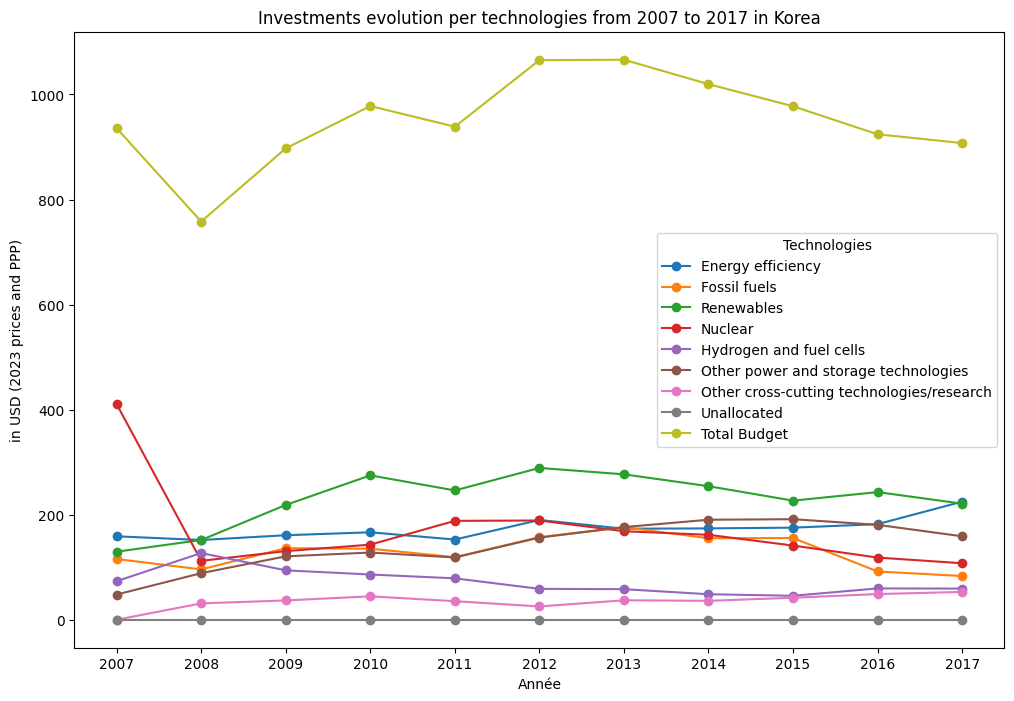

In [46]:
#graph dévolution des investissements
# Mettre 'Technology' comme index
budgets_korea.set_index('Technology', inplace=True)

# Création du graphique en ligne
plt.figure(figsize=(12, 8))

for tech in budgets_korea.index:
    plt.plot(budgets_korea.columns, budgets_korea.loc[tech], marker='o', label=tech)

plt.title('Investments evolution per technologies from 2007 to 2017 in Korea')
plt.xlabel('Année')
plt.ylabel('in USD (2023 prices and PPP)')
plt.legend(title='Technologies')
plt.grid(False)
plt.show()

##### Répartition des investissements ER sur total inv énergie de 2007 à 2017

In [47]:
budgets_korea

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Technology,,,,,,,,,,,
Energy efficiency,158.801,151.771,160.843,166.444,152.633,189.883,173.239,173.883,175.284,181.952,224.707
Fossil fuels,115.552,95.804,136.186,135.243,119.07,157.152,176.102,155.116,155.498,91.879,83.219
Renewables,129.524,151.78,218.479,274.846,246.099,289.01,276.769,254.233,226.701,242.974,220.966
Nuclear,410.286,112.09,130.563,142.947,188.243,188.905,168.511,161.659,141.214,118.329,107.505
Hydrogen and fuel cells,73.429,126.927,93.986,86.056,78.814,58.779,58.193,48.524,45.597,59.593,59.251
Other power and storage technologies,47.995,88.623,120.67,127.895,118.507,156.38,176.334,190.369,191.383,180.641,158.838
Other cross-cutting technologies/research,0.0,31.093,36.705,44.504,35.314,25.254,37.007,35.923,41.864,48.828,52.997
Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Budget,935.586,758.088,897.433,977.935,938.68,1065.363,1066.156,1019.707,977.54,924.195,907.483


In [48]:
# On repasse le 'Technology' en en-tête
budgets_korea = budgets_korea.reset_index()
budgets_korea

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Energy efficiency,158.801,151.771,160.843,166.444,152.633,189.883,173.239,173.883,175.284,181.952,224.707
1,Fossil fuels,115.552,95.804,136.186,135.243,119.07,157.152,176.102,155.116,155.498,91.879,83.219
2,Renewables,129.524,151.78,218.479,274.846,246.099,289.01,276.769,254.233,226.701,242.974,220.966
3,Nuclear,410.286,112.09,130.563,142.947,188.243,188.905,168.511,161.659,141.214,118.329,107.505
4,Hydrogen and fuel cells,73.429,126.927,93.986,86.056,78.814,58.779,58.193,48.524,45.597,59.593,59.251
5,Other power and storage technologies,47.995,88.623,120.67,127.895,118.507,156.38,176.334,190.369,191.383,180.641,158.838
6,Other cross-cutting technologies/research,0.0,31.093,36.705,44.504,35.314,25.254,37.007,35.923,41.864,48.828,52.997
7,Unallocated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Total Budget,935.586,758.088,897.433,977.935,938.68,1065.363,1066.156,1019.707,977.54,924.195,907.483


In [49]:
Technology_a_conserver = ['Renewables', 'Total Budget']

budgets_korea_ERtot = budgets_korea[budgets_korea['Technology'].isin(Technology_a_conserver)]
budgets_korea_ERtot

,Technology,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,Renewables,129.524,151.78,218.479,274.846,246.099,289.01,276.769,254.233,226.701,242.974,220.966
8,Total Budget,935.586,758.088,897.433,977.935,938.68,1065.363,1066.156,1019.707,977.54,924.195,907.483


In [50]:
budgets_korea_ERtot.dtypes

Technology    object
2007          object
2008          object
2009          object
2010          object
2011          object
2012          object
2013          object
2014          object
2015          object
2016          object
2017          object
dtype: object

In [51]:
colonne_to_float = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [52]:
budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)

<ipython-input-52-a9fd92aad874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)


In [53]:
budgets_korea_ERtot.dtypes

Technology     object
2007          float64
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
dtype: object

In [54]:
budgets_korea_ERtot.set_index('Technology', inplace= True)

In [55]:
budgets_korea_ERtot2 = budgets_korea_ERtot.T
budgets_korea_ERtot2

Technology,Renewables,Total Budget
2007,129.524,935.586
2008,151.780,758.088
2009,218.479,897.433
2010,274.846,977.935
2011,246.099,938.680
2012,289.010,1065.363
2013,276.769,1066.156
2014,254.233,1019.707
2015,226.701,977.540
2016,242.974,924.195


In [56]:
# Calculer la part des renouvelables et des autres pour chaque année
budgets_korea_ERtot2['Non-Renewables'] = budgets_korea_ERtot2['Total Budget'] - budgets_korea_ERtot2['Renewables']

NameError: name 'df' is not defined

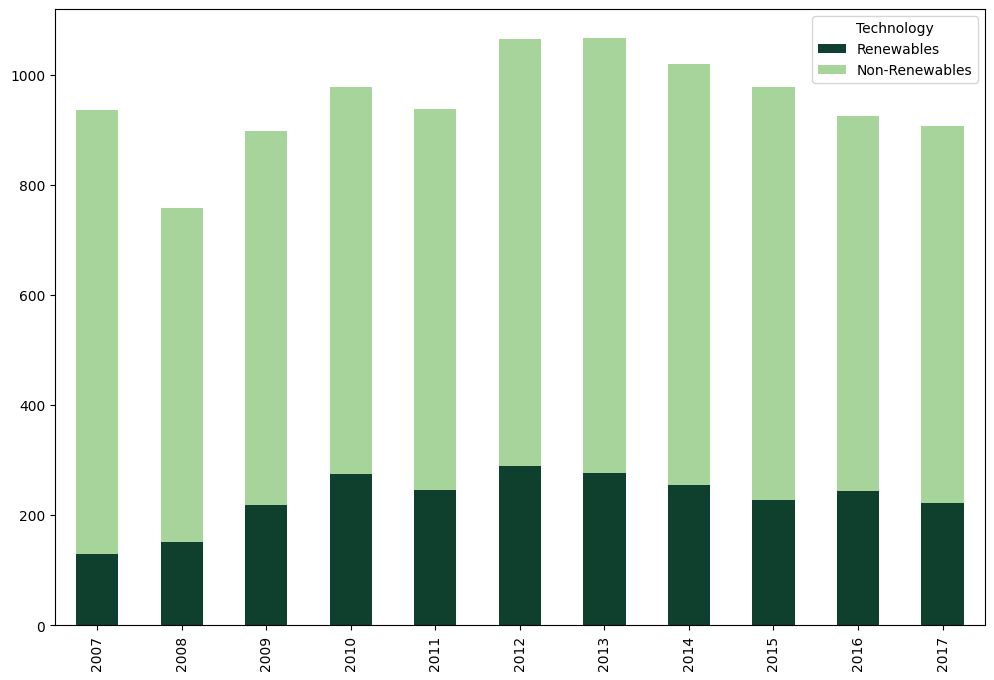

In [57]:
# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
budgets_korea_ERtot2[['Renewables', 'Non-Renewables']].plot(kind='bar', stacked=True, ax=ax, color=['#0E402D', '#A7D49B'])

# Ajouter les annotations pour les pourcentages des renouvelables
for idx, row in df.iterrows():
    total = row['Total Budget']
    renewables = row['Renewables']
    percentage = renewables / total * 100
    ax.text(idx, renewables + total * 0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Configuration des étiquettes et du titre
ax.set_xlabel('Année')
ax.set_ylabel('Budget (en millions)')
ax.set_title('Budget total avec la part des renouvelables (2007-2017)')
ax.legend(['Renouvelables', 'Non-renouvelables'], loc='upper left')

plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

#### Korea - Economie

In [ ]:
df_economy_korea = df_economy[(df_economy['Economy Name'] == 'Korea, Rep.') & (df_economy['Attribute 1'] == 'Value')]
df_economy_korea

In [ ]:
# Clean DF des colonnes inutiles
df_economy_korea = df_economy_korea.drop(columns=["Economy ISO3", "Economy Name", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_economy_korea

##### Evolution GDP (PPP$ billions) 2007 to 2017

In [ ]:
df_economy_korea_gdp = df_economy_korea[df_economy_korea['Indicator'] == 'GDP (PPP$ billions)']
df_economy_korea_gdp

In [ ]:
# Diviser les valeurs des colonnes 2007 et 2008 par 100 pour corriger l'ordre de grandeur constaté sur ces 2 années
df_economy_korea_gdp['2007'] = df_economy_korea_gdp['2007'] / 1000
df_economy_korea_gdp['2008'] = df_economy_korea_gdp['2008'] / 1000

In [ ]:
# Vérifier que les valeurs 2007 et 2008 sont bien corrigées
df_economy_korea_gdp

In [ ]:
# Transposer le DataFrame pour faciliter le traçage
df_economy_korea_gdp_t = df_economy_korea_gdp.set_index('Indicator').T
df_economy_korea_gdp_t.index.name = 'Year'
df_economy_korea_gdp_t.reset_index(inplace=True)

In [ ]:
# Tracer le graphique en lignes
plt.figure(figsize=(7, 4))
plt.plot(df_economy_korea_gdp_t['Year'], df_economy_korea_gdp_t['GDP (PPP$ billions)'], linestyle='-', color='blue', linewidth=1)

# Ajouter des étiquettes et un titre
plt.ylabel('GDP (PPP$ billions)')
plt.title('Evolution of GDP from 2007 to 2017 - Korea')

# Afficher le graphique
plt.grid(False)
plt.show()

##### Pilliers 2007 versus 2017

In [ ]:
# Liste des indicateurs que je souhaite conserver
indicators_to_keep = [
    "1st pillar: Institutions",
    "2nd pillar: Infrastructure",
    "3rd pillar: Macroeconomic environment",
    "4th pillar: Health and primary education",
    "5th pillar: Higher education and training",
    "6th pillar: Goods market efficiency",
    "7th pillar: Labor market efficiency",
    "8th pillar: Financial market development",
    "9th pillar: Technological readiness",
    "10th pillar: Market size",
    "11th pillar: Business sophistication",
    "12th pillar: Innovation",
    #"GDP (PPP$ billions)"
]


In [ ]:
# Dataframe Korea avec uniquement les indicateurs qui m'intéressent
df_economy_korea = df_economy_korea.loc[df_economy_korea['Indicator'].isin(indicators_to_keep)]
df_economy_korea

In [ ]:
# Extraire les données pour les années 2007 et 2017
data_2007 = df_economy_korea['2007']
data_2017 = df_economy_korea['2017']
indicators = df_economy_korea['Indicator']

In [ ]:
# Trier le DataFrame par les valeurs de 2007
df_economy_korea_sorted = df_economy_korea.sort_values(by='2007', ascending=False)
df_economy_korea_sorted

In [ ]:
# Extraire les données triées pour les années 2007
data_2007 = df_economy_korea_sorted['2007']
indicators = df_economy_korea_sorted['Indicator']

In [ ]:
# Créer le graphique
fig, ax = plt.subplots()

# Créer l'histogramme pour l'année 2007
ax.bar(indicators, data_2007, color='b', alpha=0.6, label='2007')

# Ajouter une courbe pour l'année 2017
ax.plot(indicators, data_2017, color='r', marker='o', label='2017')

# Définir les limites de l'axe Y de 1 à 7
ax.set_ylim(1, 7)

# Ajouter des étiquettes et un titre
#ax.set_xlabel('Indicator')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Indicators between 2007 and 2017')
ax.tick_params(axis='x', rotation=90)

# Ajouter une légende
ax.legend()


# Afficher le graphique
plt.show()

##### Pilliers comparatif au meilleur et moins bon pays sur une année donnée

In [ ]:
df_economy_gdp

In [ ]:
columns_to_drop = [str(year) for year in range(2007, 2017)]
df_economy_gdp_2017 = df_economy_gdp.drop(columns=columns_to_drop)
df_economy_gdp_2017

In [ ]:
df_economy_gdp_2017.sort_values(by="2017", ascending=False)
# USA est le premier pays en GDP
# Estonie le moins bon

# Analyse globale

### Dataframes

#### Dataframe GDP par pays de 2007 à 2017

In [ ]:
# GDP par pays de 2007 à 2008
df_economy_gdp

#### Dataframe GCI moyen par pays de 2007 à 2017

In [ ]:
# Sélection des 12 pilliers à conserver pour l'étude
selected_indicators = [
    '1st pillar: Institutions',
    '2nd pillar: Infrastructure',
    '3rd pillar: Macroeconomic environment',
    '4th pillar: Health and primary education',
    '5th pillar: Higher education and training',
    '6th pillar: Goods market efficiency',
    '7th pillar: Labor market efficiency',
    '8th pillar: Financial market development',
    '9th pillar: Technological readiness',
    '10th pillar: Market size',
    '11th pillar: Business sophistication',
    '12th pillar: Innovation'
]

In [ ]:
# Filtrer le DataFrame pour inclure uniquement les indicateurs sélectionnés (12 pilliers) et les valeurs (pas rank)
df_gci = df_economy[
    (df_economy['Indicator'].isin(selected_indicators)) &
    (df_economy['Attribute 1'] == "Value")
]

In [ ]:
# Clean DF des colonnes inutiles
df_gci = df_gci.drop(columns=["Economy ISO3", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_gci

In [ ]:
df_gci

In [ ]:
# Sélectionner les colonnes des années (de 2007 à 2017)
years = [str(year) for year in range(2007, 2018)]

In [ ]:
# Grouper par 'Economy Name' et calculer la moyenne pour chaque groupe sur les années spécifiées
df_gci_mean_country = df_gci.groupby('Economy Name')[years].mean().reset_index()
df_gci_mean_country

#### Dataframe Budgets Energies Renouvelables

In [ ]:
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK
budgets_renewables = budgets[budgets['Technology'] == 'Renewables'].drop('Technology', axis=1)
budgets_renewables.rename(columns = {'Country' : 'Economy Name'}, inplace = True)
budgets_renewables.head(3)

In [ ]:
# Aligner les noms des pays dans mes 2 df
budgets_renewables['Economy Name'] = budgets_renewables['Economy Name'].replace({'Czech Republic': 'Czechia','Korea, Rep.':'Korea','Republic of Türkiye':'Turkiye'})
budgets_renewables.head(2)

In [ ]:
budgets_renewables['Economy Name'].unique()

## KPI's comparatifs

### Top pays en investissements ER (2007-2017)

In [ ]:
budgets_renewables.head(3)

In [ ]:
budgets_renewables[colonne_to_float] = budgets_renewables[colonne_to_float].astype(float)

In [ ]:
budgets_renewables['Period 2007-2017'] = budgets_renewables[years].sum(axis=1, skipna=True).round(2)
budgets_renewables.head(3)

In [ ]:
#Display the best values of the total in ER for the period 2007-2017
budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

In [ ]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('Top  5 countries for RE investments over 2007-2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GDP (2007-2017)

In [ ]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GDP for mentioned time period and round its result to 2 decimals
df_economy_gdp['Period 2007-2017'] = df_economy_gdp[years_period].mean(axis=1).round(2)
df_economy_gdp.head(3)

In [ ]:
#Display the values of mean of GDP by descending order and filter top 5 GDP countries
df_economy_gdp.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

In [ ]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_economy_gdp.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 countries by GDP for the period 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GCI (2007-2017)

In [ ]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GCI for mentioned time period and round its result to 2 decimals
df_gci_mean_country['Period 2007-2017'] = df_gci_mean_country[years_period].mean(axis=1).round(2)
df_gci_mean_country.head(3)

In [ ]:
df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

In [ ]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 Countries by GCI from 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

## Corrélation GDP x GCI par pays de 2007 à 2017
(Global Competitiveness Index = moyenne 12 pilliers)

Répond à la question : est-ce qu'un pays avec un bon PBI est un pays ayant un bon score de compétitivité globale sur les 12 pilliers ?

##### Scatter plot des corrélations GDP x GCI
Permet de visualiser directement la relation entre le GDP et le score pour chaque pays. La ligne de régression permet de voir la tendance générale.

In [ ]:
df_economy_gdp.head(3)

In [ ]:
df_gci_mean_country.head(3)

In [ ]:
# Initialiser une liste pour stocker les résultats de corrélation
correlation_results = []

# Calculer la corrélation pour chaque pays
for country in df_economy_gdp['Economy Name']:
    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country[df_gci_mean_country['Economy Name'] == country].iloc[:, 1:].values.flatten()
    correlation = np.corrcoef(gdp_data, score_data)[0, 1]
    correlation_results.append({'Country': country, 'Correlation': correlation})

# Convertir la liste en DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Afficher les résultats de la corrélation
print(correlation_results_df)

In [ ]:
# Visualiser les scatter plots avec ligne de régression pour chaque pays
# Scatter plots avec ligne de régression : Ces graphiques permettent de visualiser directement la relation entre le GDP et le score pour chaque pays.
# Une ligne de régression permet de voir la tendance générale.
# Liste des pays à visualiser
countries = df_economy_gdp['Economy Name'].unique()

# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country[df_gci_mean_country['Economy Name'] == country].iloc[:, 1:].values.flatten()

    sns.regplot(x=gdp_data, y=score_data, ax=ax)
    ax.set_title(f'GDP vs GCI for {country} (2007-2017)')
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Economic Score (1 to 7)')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


****Interprétation des résultats :****

****Points de données :****
Chaque point sur le graphique représente une année entre 2007 et 2017.
Les points montrent la combinaison de GDP et de score économique pour chaque année.

****La ligne de régression linéaire :**** tente de modéliser la relation entre le GDP et le score économique
La pente de cette ligne indique la tendance générale
    Si pente fortement positive/négative <-> forte corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer fortement
    Si pente faiblement positive/négative <-> faible corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer faiblement
    
****L'intervalle de confiance :**** Zone bleue -> montre l'incertitude de la ligne de régression. Plus la bande est large, plus l'incertitude est grande.
    La large bande de l'intervalle de confiance indique une incertitude importante autour de la relation entre le GDP et le score économique.
    Cela signifie que la corrélation observée n'est pas très robuste et peut être sujette à des variations.

****Dispersion des données :****
    Les points sont assez dispersés autour de la ligne de régression <-> beaucoup de variabilité dans les données <-> Cela signifie que d'autres facteurs, en plus du GDP, influencent le score économique


Si ligne de régression linéaire a une faible pente
+ forte dispersion des données autour de cette ligne
+ intervalle de confiance faible (zone bleue importante)
=
Interprétation prudente : La relation entre le GDP et le score économique n'est pas suffisamment forte pour tirer des conclusions définitives

##### Heatmap des corrélations GDP x GCI
Permet de voir rapidement quelles paires de pays ont des corrélations fortes (positives ou négatives) entre leur GDP et leur score économique.

In [ ]:
# Initialiser un DataFrame pour stocker les corrélations annuelles
correlation_matrix = pd.DataFrame(index=df_economy_gdp['Economy Name'].unique(), columns=['Correlation'])

# Ajouter les corrélations calculées au DataFrame
for result in correlation_results:
    correlation_matrix.loc[result['Country']] = result['Correlation']

# Convertir les valeurs en flottants
correlation_matrix = correlation_matrix.astype(float)

# Afficher les résultats de la corrélation
print(correlation_matrix)


In [ ]:
# Générer la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of GDP vs Economic Score Correlations (2007-2017)')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.show()


****Interprétation des résultats :****

****Corrélation positive modérée à forte (orange / rouge) :****
    Ces pays montrent une forte corrélation positive entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est fortement associée à une augmentation du score économique

****Corrélations proches de zéro :**** indiquent peu ou pas de relation entre le GDP et le score économique. Cela pourrait suggérer que le score économique de ces pays est influencé par des facteurs autres que le GDP.

Si nous avions eu des corrélations négatives fortes <-> corrélation négative forte entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est associée à une diminution importante du score économique, ce qui pourrait indiquer des problèmes structurels ou d'autres facteurs influençant négativement le score économique malgré une augmentation du GDP.

## Corrélation entre le GCI x ER (part d'investissement en énergie renouvelable) pour tous les pays

Répond à la question : Existe-t-il une corrélation entre la compétitivité d'un pays et l'inv en ER ?

In [58]:
df_gci_mean_country.head(3)

NameError: name 'df_gci_mean_country' is not defined

In [ ]:
budgets_renewables.head(3)
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK


##### Scatter plot des corrélations GCI x ER

In [ ]:
# Fusionner les deux dataframes
merged_gci_er_df = pd.merge(df_gci_mean_country, budgets_renewables, on="Economy Name", suffixes=('_GCI', '_ERInvestments'))

# Liste des pays à visualiser
countries = merged_gci_er_df['Economy Name'].unique()

In [ ]:
# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GDP':'2017_GDP'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()

    sns.regplot(x=er_data, y=gci_data, ax=ax)
    ax.set_title(f'Renewable Investments vs GDP for {country} (2007-2017)')
    ax.set_xlabel('Renewable Inv (Millions of USD)')
    ax.set_ylabel('GDP')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GCI x ER #####

In [ ]:
# Calculer les corrélations
correlation_gci_er = []

for country in merged_gci_er_df['Economy Name'].unique():
    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GCI':'2017_GCI'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    correcoef_gci_er = np.corrcoef(gci_data, er_data)[0, 1]
    correlation_gci_er.append({'Country': country, 'Correlation': correcoef_gci_er})

# Convertir la liste en DataFrame
correlation_gci_er_df = pd.DataFrame(correlation_gci_er).set_index('Country')

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gci_er_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Economic Score vs Renewable Energy Investments Correlations (2007-2017)')
plt.show()

****Interprétation des résultats :****

****Corrélation négative forte (bleu) :****
    corrélation négative entre les investissements en énergie renouvelable et le score économique (GCI) <-> l'augmentation des investissements en énergie renouvelable est associée à une diminution du score économique.

****Corrélation proche de zéro (gris) :****
    Peu ou pas de corrélation


## Corrélation entre GDP x ER

In [ ]:
df_economy_gdp.head(3)

In [ ]:
budgets_renewables.head(3)

In [ ]:
# Fusionner les deux dataframes
merged_gdp_er_df = pd.merge(df_economy_gdp, budgets_renewables, on="Economy Name", suffixes=('_GDP', '_ERInvestments'))

# Liste des pays à visualiser
countries = merged_gdp_er_df['Economy Name'].unique()

##### Scatter plot des corrélations GDP x ER #####

In [ ]:
# Obtenir la liste des pays communs dans les deux dataframes
common_countries = sorted(set(df_economy_gdp['Economy Name']).intersection(set(budgets_renewables['Economy Name'])))

# Définir le nombre de lignes et de colonnes dynamiquement en fonction du nombre de pays
num_countries = len(common_countries)
num_cols = 4
num_rows = (num_countries + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

for i, country in enumerate(common_countries):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Obtenir les valeurs de GDP et d'investissement en renouvelable pour chaque pays
    gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    renewables = budgets_renewables[budgets_renewables['Economy Name'] == country].iloc[:, 1:].values.flatten()

    # Vérifier si les deux arrays ont la même longueur
    if len(gdp) == len(renewables) and len(gdp) > 0:
        sns.regplot(x=gdp, y=renewables, ax=ax, scatter_kws={'s':10}, line_kws={'color':'orange'})

    ax.set_title(country)
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Investment in Renewables (Millions of USD)')

# Si le nombre de pays n'est pas un multiple exact de num_cols, les derniers sous-plots seront vides
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GDP x ER #####

In [ ]:
# Calculer les corrélations
correlation_gdp_er = []

for country in merged_gdp_er_df['Economy Name'].unique():
    gdp_data = merged_gdp_er_df.loc[merged_gdp_er_df['Economy Name'] == country, '2007_GDP':'2017_GDP'].values.flatten()
    er_data = merged_gdp_er_df.loc[merged_gdp_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    correcoef_gdp_er = np.corrcoef(gdp_data, er_data)[0, 1]
    correlation_gdp_er.append({'Country': country, 'Correlation': correcoef_gdp_er})

# Convertir la liste en DataFrame
correlation_gdp_er_df = pd.DataFrame(correlation_gdp_er).set_index('Country')

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gdp_er_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP vs Renewable Energy Investments Correlations (2007-2017)')
plt.show()

## Corrélation entre GDP x GCI x ER

In [ ]:
df_economy_gdp.head(3)

In [ ]:
budgets_renewables.head(3)

In [ ]:
df_gci_mean_country.head(3)

##### Scatter plot des corrélations GDP x GCI x ER #####

In [ ]:
# Fusionner les trois DataFrames sur la colonne 'Economy Name'
merged_2df = pd.merge(df_economy_gdp, budgets_renewables, on='Economy Name', suffixes=('_GDP', '_Renewables'))
merged_2df.head(3)

In [ ]:
merged_3df = pd.merge(merged_2df, df_gci_mean_country, on='Economy Name', suffixes=('', '_GCI'))
merged_3df.head(3)


In [ ]:
# Calcul de la corrélation
correlation_3var = []

for country in merged_3df['Economy Name'].unique():
    data = merged_3df[merged_3df['Economy Name'] == country]

    for year in range(2007, 2018):
        gdp = data[f'{year}_GDP'].values[0]
        renewables = data[f'{year}_Renewables'].values[0]
        gci = data[f'{year}'].values[0]

        correlation_3var.append({
            'Country': country,
            'Year': year,
            'GDP': gdp,
            'Renewables': renewables,
            'GCI': gci
        })

# Convertir en DataFrame
correlation_3df = pd.DataFrame(correlation_3var)

# Calculer les corrélations
corr_matrix3 = correlation_3df[['GDP', 'Renewables', 'GCI']].corr()
print(corr_matrix3)

In [ ]:
# Définir la taille de la grille
n_countries = len(merged_3df['Economy Name'].unique())
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(merged_3df['Economy Name'].unique()):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    data = correlation_3df[correlation_3df['Country'] == country]
    sns.scatterplot(x='GDP', y='GCI', data=data, ax=ax, label='GCI vs GDP')
    sns.scatterplot(x='Renewables', y='GCI', data=data, ax=ax, label='GCI vs Renewables', marker='x')
    sns.regplot(x='GDP', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs GDP')
    sns.regplot(x='Renewables', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs Renewables', color='orange')

    ax.set_title(f'{country} (2007-2017)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Economic Score (1 to 7)')
    ax.legend()

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


##### Heatmap des corrélations GDP x GCI x ER #####

In [ ]:
# Calculer les corrélations pour chaque pays
heatmap_data = []

for country in merged_3df['Economy Name'].unique():
    data = merged_3df[merged_3df['Economy Name'] == country]
    correlation_gdp_gci = data.loc[:, '2007_GDP':'2017_GDP'].values.flatten()
    correlation_renewables_gci = data.loc[:, '2007_Renewables':'2017_Renewables'].values.flatten()
    correlation_gdp_renewables = data.loc[:, '2007_GDP':'2017_GDP'].values.flatten()
    correlation_gdp_gci = np.corrcoef(correlation_gdp_gci, data.loc[:, '2007':'2017'].values.flatten())[0, 1]
    correlation_renewables_gci = np.corrcoef(correlation_renewables_gci, data.loc[:, '2007':'2017'].values.flatten())[0, 1]
    correlation_gdp_renewables = np.corrcoef(correlation_gdp_renewables, data.loc[:, '2007_Renewables':'2017_Renewables'].values.flatten())[0, 1]

    heatmap_data.append({
        'Country': country,
        'GDP vs GCI': correlation_gdp_gci,
        'Renewables vs GCI': correlation_renewables_gci,
        'GDP vs Renewables': correlation_gdp_renewables
    })

# Convertir en DataFrame
heatmap_df = pd.DataFrame(heatmap_data).set_index('Country')

# Plot de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP, Renewables vs Economic Score Correlations (2007-2017)')
plt.show()